# 2
Даны строка X и суффиксный массив S. За линейное относительно длины слова X время вычислить BWT(X) и функцию C от всех символов алфавита ($, A, C, G, T). 

Пример: дано X =ATATATTAG и S = [10, 8, 1, 3, 5, 9, 7, 2, 4, 6], программа должна вывести BWT(X) = GT$TTATAAA и значения C: C($) = 0, C(A) = 1, C(C) = 5,C(G) = 5, C(T) = 6.

In [20]:
x=''.join(['$',input('введите строку X: ').upper()])
s=input('введите суффиксный массив: ').split(', ')
for i in range(len(s)):
    s[i]=int(s[i])

bwt=[]
for i in s:
    if x[i-1]!='$':
        bwt.append(x[i-1])
bwt=''.join(bwt)
print('BWT(X)=',bwt,sep='')

c={'$':0,'A':0,'C':0,'G':0,'T':0}
for i in c:
    for j in x:
        if j==i:
            c[i]+=1

c_final={}
c_final['$']=0
c_final['A']=c['$']
c_final['C']=c_final['A']+c['A']
c_final['G']=c_final['C']+c['C']
c_final['T']=c_final['G']+c['G']
for i in c_final:
    print('C(',i,')=',c_final[i],sep='')

введите строку X: ATATATTAG
введите суффиксный массив: 10, 8, 1, 3, 5, 9, 7, 2, 4, 6
BWT(X)=GTTTATAAA
C($)=0
C(A)=1
C(C)=5
C(G)=5
C(T)=6


# 4
Определить множества топ-100 генов с наибольшим покрытиемридами для образцов TCGA-A6-2671-11A и TCGA-A6-2675-11A. Сколько генов находится в пересечении двух полученных множеств?
# 5
Построить scatterplot, ось абсцисс которого ассоциирована с покрытием ридами в образце TCGA-A6-2671-11A, ось ординат с покрытием ридами в образце TCGA-A6-2675-11A, а точками являются гены из пересечения, полученного в задаче 4.

топ-100 генов с наибольшим покрытием ридами для образца TCGA-A6-2671-11A:
Index(['ACTB', 'ACTG1', 'ACTG2', 'ACTN4', 'AHNAK', 'ALDOA', 'AOC1', 'APP',
       'AQP8', 'ATP1A1', 'ATP5B', 'B2M', 'BSG', 'CA1', 'CA2', 'CD24', 'CD74',
       'CEACAM5', 'CEACAM7', 'CES2', 'CFL1', 'CKB', 'CLCA4', 'CLDN4', 'CTSD',
       'DES', 'EEF1A1', 'EEF2', 'EPCAM', 'FABP1', 'FCGBP', 'FLNA', 'FTH1',
       'FTL', 'FXYD3', 'GAPDH', 'GPA33', 'GSN', 'HLA-A', 'HLA-B', 'HLA-C',
       'HLA-E', 'HMGCS2', 'IGHA1', 'IGHA2', 'IGJ', 'IGKC', 'ITM2C', 'KRT18',
       'KRT19', 'KRT20', 'KRT8', 'LGALS3', 'LGALS3BP', 'LGALS4', 'MT-ATP6',
       'MT-CO1', 'MT-CO2', 'MT-CO3', 'MT-CYB', 'MT-ND1', 'MT-ND2', 'MT-ND3',
       'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-RNR1', 'MT-RNR2', 'MUC13', 'MUC2',
       'MYH11', 'MYH14', 'MYH9', 'MYL6', 'MYL9', 'PIGR', 'PSAP', 'RPL10',
       'RPL13', 'RPL13A', 'RPL3', 'RPL8', 'RPLP0', 'RPLP1', 'RPS11', 'RPS18',
       'RPS3', 'RPS6', 'S100A6', 'SELENBP1', 'SLC26A2', 'SLC26A3', 'ST14',
       'TMBI

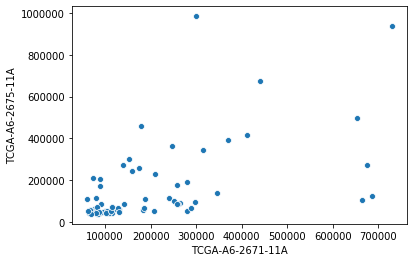

In [37]:
import pandas as pd
df = pd.read_csv("TCGA-COAD.tsv", sep="\t", index_col=0)

# print(df.nlargest(100,["TCGA-A6-2671-11A"])) #распечатав, узнаём, что 100-е max значение = 60116
max_100_1=df.index[df["TCGA-A6-2671-11A"] > 60116]
print('топ-100 генов с наибольшим покрытием ридами для образца TCGA-A6-2671-11A:',max_100_1,sep='\n',end='\n\n')
# print(df.nlargest(100,["TCGA-A6-2675-11A"])) #распечатав, узнаём, что 100-е max значение = 38340
max_100_5=df.index[df["TCGA-A6-2675-11A"] > 38340]
print('топ-100 генов с наибольшим покрытием ридами для образца TCGA-A6-2675-11A:',max_100_5,sep='\n',end='\n\n')

df1=df.loc[(df["TCGA-A6-2671-11A"] > 60116) & (df["TCGA-A6-2675-11A"] > 38340), ['TCGA-A6-2671-11A','TCGA-A6-2675-11A']]
print(df1)
# распечатав, узнаём, что рядов 68 => Ответ: 68 генов находится в пересечении множеств

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df1, x="TCGA-A6-2671-11A", y="TCGA-A6-2675-11A")